# Setup 

In [1]:
# setup random indicies
import numpy as np

np.random.seed(9)

house_ids = range(1,1461)
random_id = np.random.choice(house_ids, 1460, replace = False)


# load df
import pandas as pd
df = pd.read_csv("../data/train_model.csv")

# randomized index
df.drop(columns = ['Unnamed: 0', 'Id'], inplace = True)
df['random_id'] = random_id
df.set_index('random_id', inplace = True)
df.sort_index(inplace=True)
df.head(5)

# remove outliers
df.drop([907, 465], inplace=True)

# log transform SalePrice
df['SalePrice'] = np.log(df.SalePrice)

df.head(5)

,LotFrontage,LotArea,YearBuilt,GrLivArea,YrSold,SalePrice,MSZoning_RL,MSZoning_RMH,Alley_NoAccess,LotShape_Regular,...,OpenPorchSF_OpenPorch_Yes,Fence_no_fence,MoSold_peak_months,SaleType_non_deed,SaleCondition_not_normal,IsVinyl_yes,FullBaths_<=1FullBath,FullBaths_>=3FullBaths,HalfBaths_>=1HalfBaths,Enclosed_combined_EnclosedPorch_Yes
random_id,,,,,,,,,,,,,,,,,,,,,
1,87.0,9246,37,1656,2008,11.813030,1,0,1,0,...,1,1,0,0,0,0,0,0,0,0
2,60.0,7200,60,1904,2009,11.835009,1,0,1,1,...,0,0,1,0,0,1,0,0,1,1
3,74.0,8532,56,1297,2009,11.938193,1,0,1,1,...,0,1,0,0,0,0,1,0,1,0
4,47.0,53504,7,3279,2010,13.195614,1,0,1,0,...,1,1,1,0,0,0,0,1,1,1
5,82.0,9430,11,2365,2009,12.727838,1,0,1,1,...,1,1,1,0,0,1,0,1,1,1


# Setup CV 
1) group - everybody do this to cross-confirm
2) phoebe
3) mike
4) john
5) henry

In [2]:
test_1 = df.iloc[0:292,:]
test_2 = df.iloc[292:584,:]
test_3 = df.iloc[584:876,:]
test_4 = df.iloc[876:1168,:]
test_5 = df.iloc[1168:1460,:]
print(len(test_1))
print(len(test_2))
print(len(test_3))
print(len(test_4))
print(len(test_5)) # note 2 fewer due to dropped outliers above

292
292
292
292
290


In [3]:
group_test = test_1.copy()
group_train = pd.concat([test_2, test_3, test_4, test_5]).copy()
mike_test = test_3.copy()
mike_train = pd.concat([test_1, test_2, test_4, test_5]).copy()

# Modeling

### I. Saturated model - group 

In [4]:
from sklearn import linear_model
ols = linear_model.LinearRegression()

In [5]:
X_train = group_train.drop(['SalePrice'], axis = 1)
y_train = group_train.SalePrice

X_test = group_test.drop('SalePrice', axis = 1)
y_test = group_test.SalePrice

https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034

In [6]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.graphics.gofplots import ProbPlot

plt.style.use('seaborn') # pretty matplotlib plots

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [7]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train)
model_fit = model.fit()
#print(model_fit.summary())

In [8]:
ols.fit(X_train, y_train)
print("Train Set")
print(10*"~")
print("R2: %.3f" % ols.score(X_train, y_train))
print("RSS: %.2f" % np.sum(((y_train) - (ols.predict(X_train))) ** 2))
print("RMSE: %.4f" % np.sqrt(np.sum(((y_train) - (ols.predict(X_train))) ** 2)/len(y_train)))

print("\nTest Set")
print(10*"~")
print("R2: %.3f" % ols.score(X_test, y_test))
print("RSS: %.2f" % np.sum(((y_test) - (ols.predict(X_test))) ** 2))
print("RMSE: %.4f" % np.sqrt(np.sum(((y_test) - (ols.predict(X_test))) ** 2)/len(y_test)))

Train Set
~~~~~~~~~~
R2: 0.907
RSS: 16.80
RMSE: 0.1200

Test Set
~~~~~~~~~~
R2: 0.879
RSS: 6.32
RMSE: 0.1471


### I. Saturated model - mike 

In [9]:
# Setup test and train sets for model

X_train = mike_train.drop(['SalePrice'], axis = 1)
X_train = sm.add_constant(X_train)  # add constant for training model
y_train = mike_train.SalePrice

X_test = mike_test.drop('SalePrice', axis = 1)
X_test = sm.add_constant(X_test)
y_test = mike_test.SalePrice


# Run model

model = sm.OLS(y_train, X_train)
model_fit = model.fit()
print(model_fit.summary())

# Evaluate results

print("Evaluating Model")
print(80*"=")

ols.fit(X_train, y_train)
print("Train Set")
print(10*"~")
print("R2: %.3f" % ols.score(X_train, y_train))
print("RSS: %.2f" % np.sum(((y_train) - (ols.predict(X_train))) ** 2))
print("RMSE: %.4f" % np.sqrt(np.sum(((y_train) - (ols.predict(X_train))) ** 2)/len(y_train)))

print("\nTest Set")
print(10*"~")
print("R2: %.3f" % ols.score(X_test, y_test))
print("RSS: %.2f" % np.sum(((y_test) - (ols.predict(X_test))) ** 2))
print("RMSE: %.4f" % np.sqrt(np.sum(((y_test) - (ols.predict(X_test))) ** 2)/len(y_test)))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     158.2
Date:                Thu, 31 May 2018   Prob (F-statistic):               0.00
Time:                        12:09:14   Log-Likelihood:                 821.29
No. Observations:                1166   AIC:                            -1505.
Df Residuals:                    1097   BIC:                            -1155.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

### II. Reduced Model - group

In [10]:
import sklearn.feature_selection as fs
import matplotlib.pyplot as plt


# setup for group selection
X_train = group_train.drop(['SalePrice'], axis = 1)
X_train = sm.add_constant(X_train)  # add constant for training model
y_train = group_train.SalePrice

X_test = group_test.drop('SalePrice', axis = 1)
X_test = sm.add_constant(X_test)
y_test = group_test.SalePrice

best30 = fs.SelectKBest(fs.f_regression, k=30).fit_transform(X_train, y_train)
best30 = sm.add_constant(best30)

ols.fit(best30, y_train)
print("\nTrain Set")
print(10*"~")
print("RSS: %.2f" % np.sum(((y_train) - (ols.predict(best30))) ** 2))
print("RMSE: %.4f" % np.sqrt(np.sum(((y_train) - (ols.predict(best30))) ** 2)/len(y_train)))


# Create and fit selector
selector = fs.SelectKBest(fs.f_regression, k=6)
selector.fit(X_train, y_train)
# Get idxs of columns to keep
idxs = selector.get_support(indices=True).tolist()
# Create new dataframe with only desired columns, or overwrite existing
print(idxs)
#idxs
X_test.iloc[:,idxs]



Train Set
~~~~~~~~~~
RSS: 22.69
RMSE: 0.1395
[3, 4, 20, 26, 29, 55]


/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:303: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,YearBuilt,GrLivArea,OverallQual_HighQ,ExterQual_low,BsmtQual_low,GarageCars_AtLeast3
random_id,,,,,,
1,37,1656,0,1,1,0
2,60,1904,0,1,1,0
3,56,1297,0,1,1,0
4,7,3279,1,0,0,1
5,11,2365,1,0,0,1
6,89,1710,0,1,1,0
7,4,1125,0,1,0,0
8,34,1370,0,1,0,0
9,56,1008,0,1,1,0


In [11]:
# setup for group selection
X_train = group_train.drop(['SalePrice'], axis = 1)
X_train = sm.add_constant(X_train)  # add constant for training model
y_train = group_train.SalePrice

X_test = group_test.drop('SalePrice', axis = 1)
X_test = sm.add_constant(X_test)
y_test = group_test.SalePrice

RMSE_reduced = []
test_RMSE_reduced = []
for feat in range(1,len(X_train.columns)):
    #select for KBest features by f_regression
    stepwise_features = fs.SelectKBest(fs.f_regression, k=feat)
    stepwise_features.fit(X_train, y_train)
    idxs = stepwise_features.get_support(indices=True).tolist()
    #fit model based on k features
    ols.fit(X_train.iloc[:,idxs], y_train)
    RMSE_reduced.append(np.sqrt(np.sum(((y_train) - (ols.predict(X_train.iloc[:,idxs]))) ** 2)/len(y_train)))
    test_RMSE_reduced.append(np.sqrt(np.sum(((y_test) - (ols.predict(X_test.iloc[:,idxs]))) ** 2)/len(y_test)))
test_1 = test_RMSE_reduced

/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:303: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


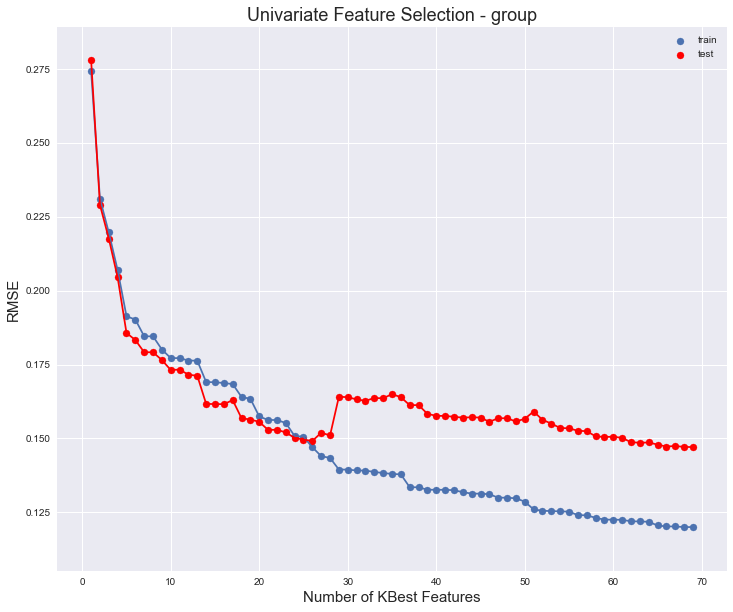

In [12]:
plt.figure(figsize=(12, 10))
s1 = plt.scatter(range(1,len(RMSE_reduced)+1), RMSE_reduced, label='train')
plt.plot(range(1,len(RMSE_reduced)+1), RMSE_reduced)
s2 = plt.scatter(range(1,len(test_RMSE_reduced)+1), test_RMSE_reduced, color='red', label='test')
plt.plot(range(1,len(test_RMSE_reduced)+1), test_RMSE_reduced, color='red')
plt.title('Univariate Feature Selection - group')
plt.xlabel('Number of KBest Features')
plt.ylabel('RMSE')
plt.legend(handles=[s1, s2], loc=1)
plt.show()

### II. Reduced Model - mike

/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:303: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


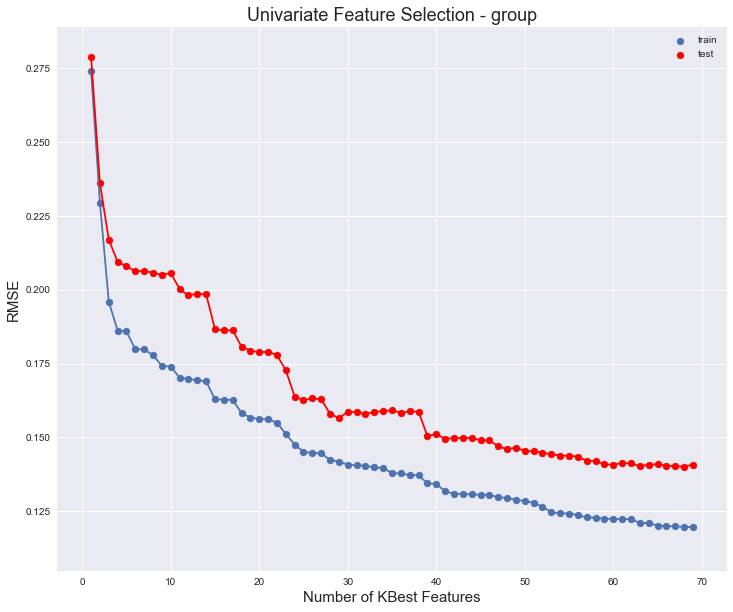

In [13]:
# setup for mike selection
X_train = mike_train.drop(['SalePrice'], axis = 1)
X_train = sm.add_constant(X_train)  # add constant for training model
y_train = mike_train.SalePrice

X_test = mike_test.drop('SalePrice', axis = 1)
X_test = sm.add_constant(X_test)
y_test = mike_test.SalePrice


RMSE_reduced = []
test_RMSE_reduced = []
for feat in range(1,len(X_train.columns)):
    #select for KBest features by f_regression
    stepwise_features = fs.SelectKBest(fs.f_regression, k=feat)
    stepwise_features.fit(X_train, y_train)
    idxs = stepwise_features.get_support(indices=True).tolist()
    #fit model based on k features
    ols.fit(X_train.iloc[:,idxs], y_train)
    RMSE_reduced.append(np.sqrt(np.sum(((y_train) - (ols.predict(X_train.iloc[:,idxs]))) ** 2)/len(y_train)))
    test_RMSE_reduced.append(np.sqrt(np.sum(((y_test) - (ols.predict(X_test.iloc[:,idxs]))) ** 2)/len(y_test)))

test_2 = test_RMSE_reduced
    
plt.figure(figsize=(12, 10))
s1 = plt.scatter(range(1,len(RMSE_reduced)+1), RMSE_reduced, label='train')
plt.plot(range(1,len(RMSE_reduced)+1), RMSE_reduced)
s2 = plt.scatter(range(1,len(test_RMSE_reduced)+1), test_RMSE_reduced, color='red', label='test')
plt.plot(range(1,len(test_RMSE_reduced)+1), test_RMSE_reduced, color='red')
plt.title('Univariate Feature Selection - group')
plt.xlabel('Number of KBest Features')
plt.ylabel('RMSE')
plt.legend(handles=[s1, s2], loc=1)
plt.show()


### KBest Features, CV plot

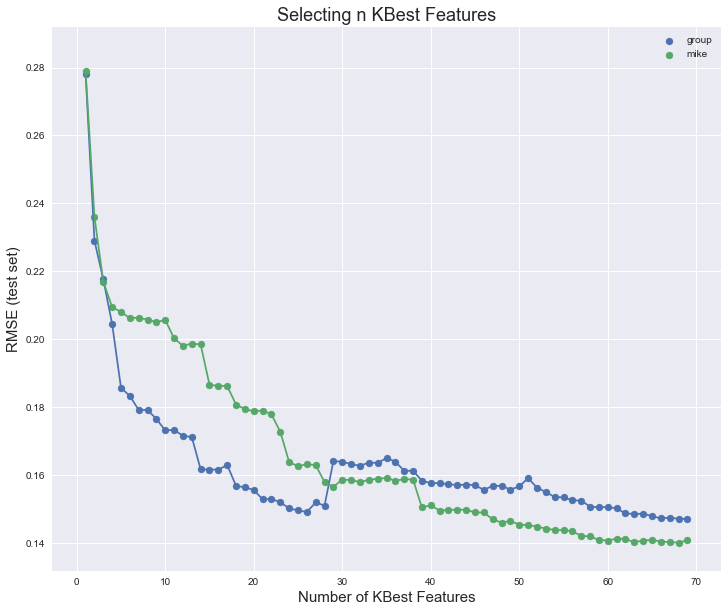

In [23]:
combined = pd.DataFrame({'group': test_1,
                        'mike': test_2})
plt.figure(figsize=(12, 10))
s1 = plt.scatter(range(1,len(RMSE_reduced)+1), test_1, label='group')
plt.plot(range(1,len(RMSE_reduced)+1), test_1)
s2 = plt.scatter(range(1,len(test_RMSE_reduced)+1), test_2,  label='mike')
plt.plot(range(1,len(test_RMSE_reduced)+1), test_2)
plt.title('Selecting n KBest Features')
plt.xlabel('Number of KBest Features')
plt.ylabel('RMSE (test set)')
plt.legend(handles=[s1, s2], loc=1)
plt.show()